In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/PHD/SemEval2023/SemEval2022-Task10/private_space

/content/gdrive/MyDrive/PHD/SemEval2023/SemEval2022-Task10/private_space


In [3]:
import pandas as pd

data = pd.read_csv("Data/starting_ki/train_all_tasks.csv")
# dfa = pd.read_csv("Data/dev_task_a_entries.csv")
# dfb = pd.read_csv("Data/dev_task_b_entries.csv")
# dfc = pd.read_csv("Data/dev_task_c_entries.csv")

In [4]:
import json

with open('../Results/TaskB/lexicon_pmi.json') as fin:
    lexicon_pmi = json.load(fin)

with open('../Results/TaskB/lexicon_shapley.json') as fin:
    lexicon_shapley = json.load(fin)

with open('../Results/TaskB/lexicon_shapley_augmented_v2_shap.json') as fin:
    lexicon_shapley_augmented_v2_shap = json.load(fin)

with open('../Results/TaskB/lexicon_shapley_augmented_v3_gptj.json') as fin:
    lexicon_shapley_augmented_v3_gptj = json.load(fin)

with open('../Results/TaskB/lexicon_shapley_augmented_v4_tweetbert.json') as fin:
    lexicon_shapley_augmented_v4_tweetbert = json.load(fin)

In [5]:
data

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
...,...,...,...,...,...
13995,sexism2022_english-14185,complexes like the 'nice chicks' that go after...,sexist,2. derogation,2.1 descriptive attacks
13996,sexism2022_english-18629,"""GRAPHIC Germany - Muslim ""refugee"" stabbing h...",not sexist,none,none
13997,sexism2022_english-3320,Lol I imagine there would be simps that are li...,not sexist,none,none
13998,sexism2022_english-13309,"It's not, the girls I go on dates with don't k...",not sexist,none,none


In [6]:
task = "1b"

In [7]:
if not task.endswith("a"):
  data = data[data["label_category"]!="none"]

In [8]:
if task.endswith("a"):
  label_column = "label_sexist"
elif task.endswith("b"):
  label_column = "label_category"
elif task.endswith("c"):
  label_column = "label_vector"


label_column

'label_category'

In [9]:
len(data)

3398

In [10]:
data[["text", label_column]].groupby(label_column).count()

,text
label_category,
"1. threats, plans to harm and incitement",310
2. derogation,1590
3. animosity,1165
4. prejudiced discussions,333


In [11]:
# label_values = data[label_column].unique()
# label_values
if label_column == "label_sexist":
  label_values = [
      'sexist',
      'not sexist',
  ]

  label_map = {
      0: 'not sexist',
      1: 'sexist', 
      'not sexist':0,
      'sexist':1,
  }
elif label_column == "label_category":
  label_values = [
      '1. threats, plans to harm and incitement',
      '2. derogation',
      '3. animosity',
      '4. prejudiced discussions',
  ]

  label_map = {
      0: '1. threats, plans to harm and incitement',
      1: '2. derogation', 
      2: '3. animosity', 
      3: '4. prejudiced discussions',
      '1. threats, plans to harm and incitement':0,
      '2. derogation':1,
      '3. animosity':2,
      '4. prejudiced discussions':3,
  }
elif label_column == "label_vector":
  label_values = [
      '1.1 threats of harm',
      '1.2 incitement and encouragement of harm',
      '2.1 descriptive attacks',
      '2.2 aggressive and emotive attacks',
      '2.3 dehumanising attacks & overt sexual objectification',
      '3.1 casual use of gendered slurs, profanities, and insults',
      '3.2 immutable gender differences and gender stereotypes',
      '3.3 backhanded gendered compliments',
      '3.4 condescending explanations or unwelcome advice',
      '4.1 supporting mistreatment of individual women',
      '4.2 supporting systemic discrimination against women as a group',
  ]

  label_map = {
      0: '1.1 threats of harm',
      1: '1.2 incitement and encouragement of harm',
      2: '2.1 descriptive attacks',
      3: '2.2 aggressive and emotive attacks',
      4: '2.3 dehumanising attacks & overt sexual objectification',
      5: '3.1 casual use of gendered slurs, profanities, and insults',
      6: '3.2 immutable gender differences and gender stereotypes',
      7: '3.3 backhanded gendered compliments',
      8: '3.4 condescending explanations or unwelcome advice',
      9: '4.1 supporting mistreatment of individual women',
      10: '4.2 supporting systemic discrimination against women as a group',
      '1.1 threats of harm': 0,
      '1.2 incitement and encouragement of harm': 1,
      '2.1 descriptive attacks': 2,
      '2.2 aggressive and emotive attacks': 3,
      '2.3 dehumanising attacks & overt sexual objectification': 4,
      '3.1 casual use of gendered slurs, profanities, and insults': 5,
      '3.2 immutable gender differences and gender stereotypes': 6,
      '3.3 backhanded gendered compliments': 7,
      '3.4 condescending explanations or unwelcome advice': 8,
      '4.1 supporting mistreatment of individual women': 9,
      '4.2 supporting systemic discrimination against women as a group': 10,
  }
else:
  raise Exception("Unknown label column")

In [12]:
texts = data['text'].values

def label_to_number(label_map, label):
  return label_map[label]

labels = [label_to_number(label_map, d) for d in data[label_column].values]

In [13]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

2
54


In [14]:
sum(labels)

4919

# Prepare Data

In [15]:
!pip install -q transformers

In [16]:
import transformers

In [17]:
from transformers import BertTokenizer
from transformers import AutoModel, AutoTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-large")

print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))


Original Text:  just the inside of your wallet: cash, bank cards, credit cards, debit cards. That is the inside that matters to femoids. 

Tokenized Text:  ['just', 'the', 'inside', 'of', 'your', 'wallet', ':', 'cash', ',', 'bank', 'cards', ',', 'credit', 'cards', ',', 'de', '##bit', 'cards', '.', 'that', 'is', 'the', 'inside', 'that', 'matters', 'to', 'fe', '##mo', '##ids', '.'] 

Token IDs:  [2074, 1996, 2503, 1997, 2115, 15882, 1024, 5356, 1010, 2924, 5329, 1010, 4923, 5329, 1010, 2139, 16313, 5329, 1012, 2008, 2003, 1996, 2503, 2008, 5609, 2000, 10768, 5302, 9821, 1012]


In [18]:
!pip3 install -q nltk emoji==0.6.0

In [19]:
from emoji import demojize
from nltk.tokenize import TweetTokenizer


nltktokenizer = TweetTokenizer()


def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token


def normalizeTweet(tweet):
    tokens = nltktokenizer.tokenize(tweet.replace("’", "'").replace("…", "..."))
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = (
        normTweet.replace("cannot ", "can not ")
        .replace("n't ", " n't ")
        .replace("n 't ", " n't ")
        .replace("ca n't", "can't")
        .replace("ai n't", "ain't")
    )
    normTweet = (
        normTweet.replace("'m ", " 'm ")
        .replace("'re ", " 're ")
        .replace("'s ", " 's ")
        .replace("'ll ", " 'll ")
        .replace("'d ", " 'd ")
        .replace("'ve ", " 've ")
    )
    normTweet = (
        normTweet.replace(" p . m .", "  p.m.")
        .replace(" p . m ", " p.m ")
        .replace(" a . m .", " a.m.")
        .replace(" a . m ", " a.m ")
    )

    return " ".join(normTweet.split())

In [20]:
normalizeTweet("DHEC confirms https://postandcourier.com/health/covid19/sc-has-first-two-presumptive-cases-of-coronavirus-dhec-confirms/article_bddfe4ae-5fd3-11ea-9ce4-5f495366cee6.html?utm_medium=social&utm_source=twitter&utm_campaign=user-share… via @postandcourier 😢")


'DHEC confirms HTTPURL ... via @USER :crying_face:'

In [21]:
text_ids = [tokenizer.encode(text, max_length=100, padding='max_length', truncation=True) for text in texts]

In [22]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))


100
100


In [23]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import  word_tokenize

lexicons = lexicon_shapley
# lexicons = lexicon_shapley_augmented_v2_shap

lexcon_emb = []
for text in texts:
  words = word_tokenize(text)

  embs = []
  for w in words:
    e = []
    for label in lexicons:
      if w in lexicons[label]:
        e.append(1.0)
      else:
        e.append(0.0)
    embs.append(e)

  while len(embs) < 100:
    embs.append([0 for l in lexicons])
  lexcon_emb.append(embs)


In [26]:
import torch
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y, train_m, test_val_m, train_l, test_val_l = train_test_split(text_ids, labels, att_masks, lexcon_emb, random_state=42, test_size=0.2)
test_x, val_x, test_y, val_y, test_m, val_m, test_l, val_l = train_test_split(test_val_x, test_val_y, test_val_m, test_val_l, random_state=42, test_size=0.5)


## Convert to tensor
train_x = torch.tensor(train_x);
test_x = torch.tensor(test_x);
val_x = torch.tensor(val_x);

train_y = torch.tensor(train_y);
test_y = torch.tensor(test_y);
val_y = torch.tensor(val_y);

train_m = torch.tensor(train_m);
test_m = torch.tensor(test_m);
val_m = torch.tensor(val_m);

train_l = torch.tensor(train_l);
test_l = torch.tensor(test_l);
val_l = torch.tensor(val_l);

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_x, train_m, train_y, train_l)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y, val_l)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

## Load Model

In [28]:
from transformers import BertForSequenceClassification
from transformers import BertPreTrainedModel, BertModel
from typing import List, Optional, Tuple, Union

import torch
import torch.utils.checkpoint
from torch import nn
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss
from transformers.modeling_outputs import SequenceClassifierOutput


class CustomBertForSequenceClassification(BertForSequenceClassification):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        self.bert = BertModel(config)
        classifier_dropout = (
            config.classifier_dropout if config.classifier_dropout is not None else config.hidden_dropout_prob
        )
        self.dropout = nn.Dropout(classifier_dropout)
        self.classifier = nn.Linear(in_features=config.hidden_size+config.num_labels, out_features=config.num_labels)
        self.lstm = nn.LSTM(input_size=config.num_labels, hidden_size=config.num_labels, num_layers=1, batch_first=True)

        # Initialize weights and apply final processing
        self.post_init()

    def forward(
        self,
        input_ids: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        token_type_ids: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.Tensor] = None,
        head_mask: Optional[torch.Tensor] = None,
        inputs_embeds: Optional[torch.Tensor] = None,
        labels: Optional[torch.Tensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
        lexicon_emb: Optional[torch.Tensor] = None
    ) -> Union[Tuple[torch.Tensor], SequenceClassifierOutput]:

        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)

        lstm_output, (ht, ct) = self.lstm(lexicon_emb)
        ht = torch.squeeze(ht, dim=0)
        
        concated_ouput = torch.cat((pooled_output, ht), 1)
        
        logits = self.classifier(concated_ouput)

        loss = None
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                if self.num_labels == 1:
                    loss = loss_fct(logits.squeeze(), labels.squeeze())
                else:
                    loss = loss_fct(logits, labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)
        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [29]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import AutoModel, AutoTokenizer

num_labels = len(set(labels))

model = CustomBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels, output_attentions=False, output_hidden_states=False)
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels, output_attentions=False, output_hidden_states=False)
# model = BertForSequenceClassification.from_pretrained("vinai/bertweet-large", num_labels=num_labels, output_attentions=False, output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing CustomBertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing CustomBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CustomBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CustomBertForSequenceClassification were not initialized from

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(device)

cuda


In [31]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)

# print('Number of trainable parameters:', count_parameters(model), '\n', model)


## Fine-tune

In [32]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [33]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


In [34]:
import time
import numpy as np
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [35]:
from tqdm.notebook import tqdm
import os

train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)
tmp_out_dir = f'./Models/_tmp'

if num_mb_val == 0:
    num_mb_val = 1

best_loss = None
add_lexicon = True

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y, mb_l) in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        mb_l = mb_l.to(device)
        
        if add_lexicon:
          outputs = model(mb_x, attention_mask=mb_m, labels=mb_y, lexicon_emb=mb_l)
        else:
          outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y, mb_l) in tqdm(enumerate(val_dataloader), total=len(val_dataloader)):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
            mb_l = mb_l.to(device)
        
            if add_lexicon:
              outputs = model(mb_x, attention_mask=mb_m, labels=mb_y, lexicon_emb=mb_l)
            else:
              outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val

        if best_loss is None or best_loss >= val_loss:
            
            if not os.path.exists(tmp_out_dir):
                os.makedirs(tmp_out_dir)
                
            model.save_pretrained(tmp_out_dir)
            # tokenizer.save_pretrained(tmp_out_dir)

            best_loss = val_loss

        print("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')



  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 1: 1.188271


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 1: 1.129644
Time: 0m 51s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 2: 1.081314


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 2: 1.049921
Time: 0m 49s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 3: 0.967823


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 3: 1.021533
Time: 0m 50s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 4: 0.872779


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 4: 0.951131
Time: 0m 49s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 5: 0.777445


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 5: 0.952622
Time: 0m 48s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 6: 0.698121


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 6: 0.926756
Time: 0m 49s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 7: 0.625679


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 7: 0.947297
Time: 0m 48s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 8: 0.571634


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 8: 0.939246
Time: 0m 48s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 9: 0.533020


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 9: 0.953837
Time: 0m 48s


  0%|          | 0/85 [00:00<?, ?it/s]


Train loss after itaration 10: 0.503065


  0%|          | 0/11 [00:00<?, ?it/s]

Validation loss after itaration 10: 0.957815
Time: 0m 48s


In [36]:
model = CustomBertForSequenceClassification.from_pretrained(tmp_out_dir)
model = model.to(device)

# model = BertForSequenceClassification.from_pretrained(tmp_out_dir)
# model = model.to(device)

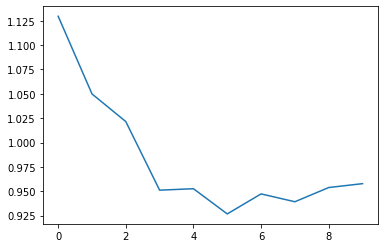

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(val_losses)

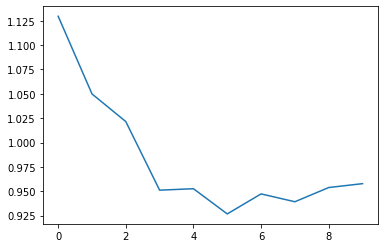

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(val_losses)

In [39]:
import pickle
import os

out_dir = f'./Models/1b_fine-tuned-bert-with-lex'
# out_dir = f'./Models/1b_fine-tuned-bert'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)


('./Models/1b_fine-tuned-bert-with-lex/tokenizer_config.json',
 './Models/1b_fine-tuned-bert-with-lex/special_tokens_map.json',
 './Models/1b_fine-tuned-bert-with-lex/vocab.txt',
 './Models/1b_fine-tuned-bert-with-lex/added_tokens.json')

## Run prediction

In [40]:
out_dir = f'./Models/1b_fine-tuned-bert-with-lex'
# out_dir = f'./Models/1b_fine-tuned-bert'

model = CustomBertForSequenceClassification.from_pretrained(out_dir)
# model = BertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [41]:
batch_size = 32

test_data = TensorDataset(test_x, test_m, test_l)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m, mb_l) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_l = mb_l.to(device)
        if add_lexicon:
          output = model(mb_x, attention_mask=mb_m, lexicon_emb=mb_l)
        else:
          output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)


In [42]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()


In [43]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)


Test Accuracy: 0.6235294117647059


In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))
p, r, f1, sup = precision_recall_fscore_support(true_values, predicted_values, average="macro")
print("F1: %.3f" % f1)
print("P: %.3f" % p)
print("R: %.3f" % r)


                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.77      0.63      0.69        27
                           2. derogation       0.66      0.70      0.68       178
                            3. animosity       0.54      0.62      0.58       103
               4. prejudiced discussions       0.58      0.22      0.32        32

                                accuracy                           0.62       340
                               macro avg       0.64      0.54      0.57       340
                            weighted avg       0.63      0.62      0.62       340

F1: 0.567
P: 0.639
R: 0.542


In [45]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 17   5   5   0]
 [  4 124  46   4]
 [  1  37  64   1]
 [  0  21   4   7]]


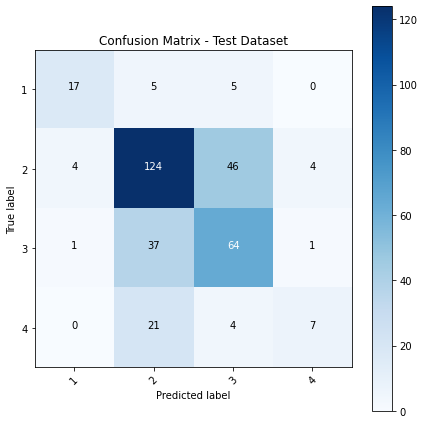

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=range(1, len(label_values)+1), title='Confusion Matrix - Test Dataset')
# plt.figure(figsize=(6,6))
# plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)


## Create Submission

In [93]:
ls ../Data

dev_task_a_entries.csv  starting_ki/             test_task_c_entries.csv
dev_task_b_entries.csv  test_task_a_entries.csv
dev_task_c_entries.csv  test_task_b_entries.csv


In [66]:
dfdev = pd.read_csv("../Data/dev_task_b_entries.csv")
dftest = pd.read_csv("../Data/test_task_b_entries.csv")

In [82]:
df = dftest
texts = df['text'].values

In [83]:
text_ids = [tokenizer.encode(text, max_length=100, padding='max_length') for text in texts]

In [84]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)

In [85]:
lexcon_emb = []
for text in texts:
  words = word_tokenize(text)

  embs = []
  for w in words:
    e = []
    for label in lexicons:
      if w in lexicons[label]:
        e.append(1.0)
      else:
        e.append(0.0)
    embs.append(e)

  while len(embs) < 100:
    embs.append([0 for l in lexicons])
  lexcon_emb.append(embs)


In [86]:
test_x = torch.tensor(text_ids);
test_m = torch.tensor(att_masks);
test_l = torch.tensor(lexcon_emb);

In [87]:
len(df), test_x.shape

(970, torch.Size([970, 100]))

In [88]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32
test_data = TensorDataset(test_x, test_m, test_l)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m, mb_l) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_l = mb_l.to(device)
        output = model(mb_x, attention_mask=mb_m, lexicon_emb=mb_l)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()

In [89]:
def number_to_label(label):
  return label_map[label]

predicted_labels = list(map(number_to_label, predicted_values))

In [90]:
len(predicted_labels)

970

In [91]:
df["label_pred"] = predicted_labels

In [92]:
df[["rewire_id", "label_pred"]].to_csv(f"../Results/1b_lexbert_test.csv", index=False)